In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [63]:
data = pd.read_csv('Lab3.csv', delimiter=';', decimal=",")

In [64]:
data.head()

,Region,Dev_projRD,Dev_1disemb,Dev_2disemb,Dev_emb,Dev_specialist,Dev_other,RDshareVPR,HtechshareVPR,DFI_shareVPR,...,Connewcountry,ShareRD_InnProd,Share RD_TotalRD,Share_OTI,ShareFI_Exp,ShareSup_Exp,Patent,Internet,ExpNew_outCIS,ShareVRP_perCapita
0,14 Белгородская область 1618,0.243580,0.0,0.000000,0.238704,0.000000,0.088198,1.946667,10.766667,2.216519,...,0.025287,0.108731,0.011974,11.417417,0.00000,0.016289,105.900000,88.366667,0.012652,1.015018
1,15 Брянская область 1618,0.557879,0.0,0.410116,0.300684,0.000000,0.000000,0.243333,19.733333,0.188089,...,0.004047,0.142699,0.001581,5.766725,0.00000,0.000011,45.833333,87.100000,0.000020,0.446531
2,17 Владимирская область 1618,1.309959,0.0,0.000000,0.625230,0.000000,0.113856,0.330000,24.700000,4.034587,...,0.006880,0.230900,0.007010,8.367196,0.00971,0.026699,161.266667,89.700000,0.002263,0.579015
3,20 Воронежская область 1618,0.429820,0.0,0.000000,0.458222,0.546871,0.000000,1.200000,19.300000,1.437805,...,0.008088,0.229827,0.010073,8.927655,0.00000,0.037837,199.966667,86.633333,0.004089,0.632578
4,24 Ивановская область 1618,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.860000,22.600000,1.814584,...,0.000124,0.505126,0.000154,3.518270,0.00000,0.117515,268.700000,86.133333,0.000000,0.382274


In [65]:
data.shape

(240, 23)

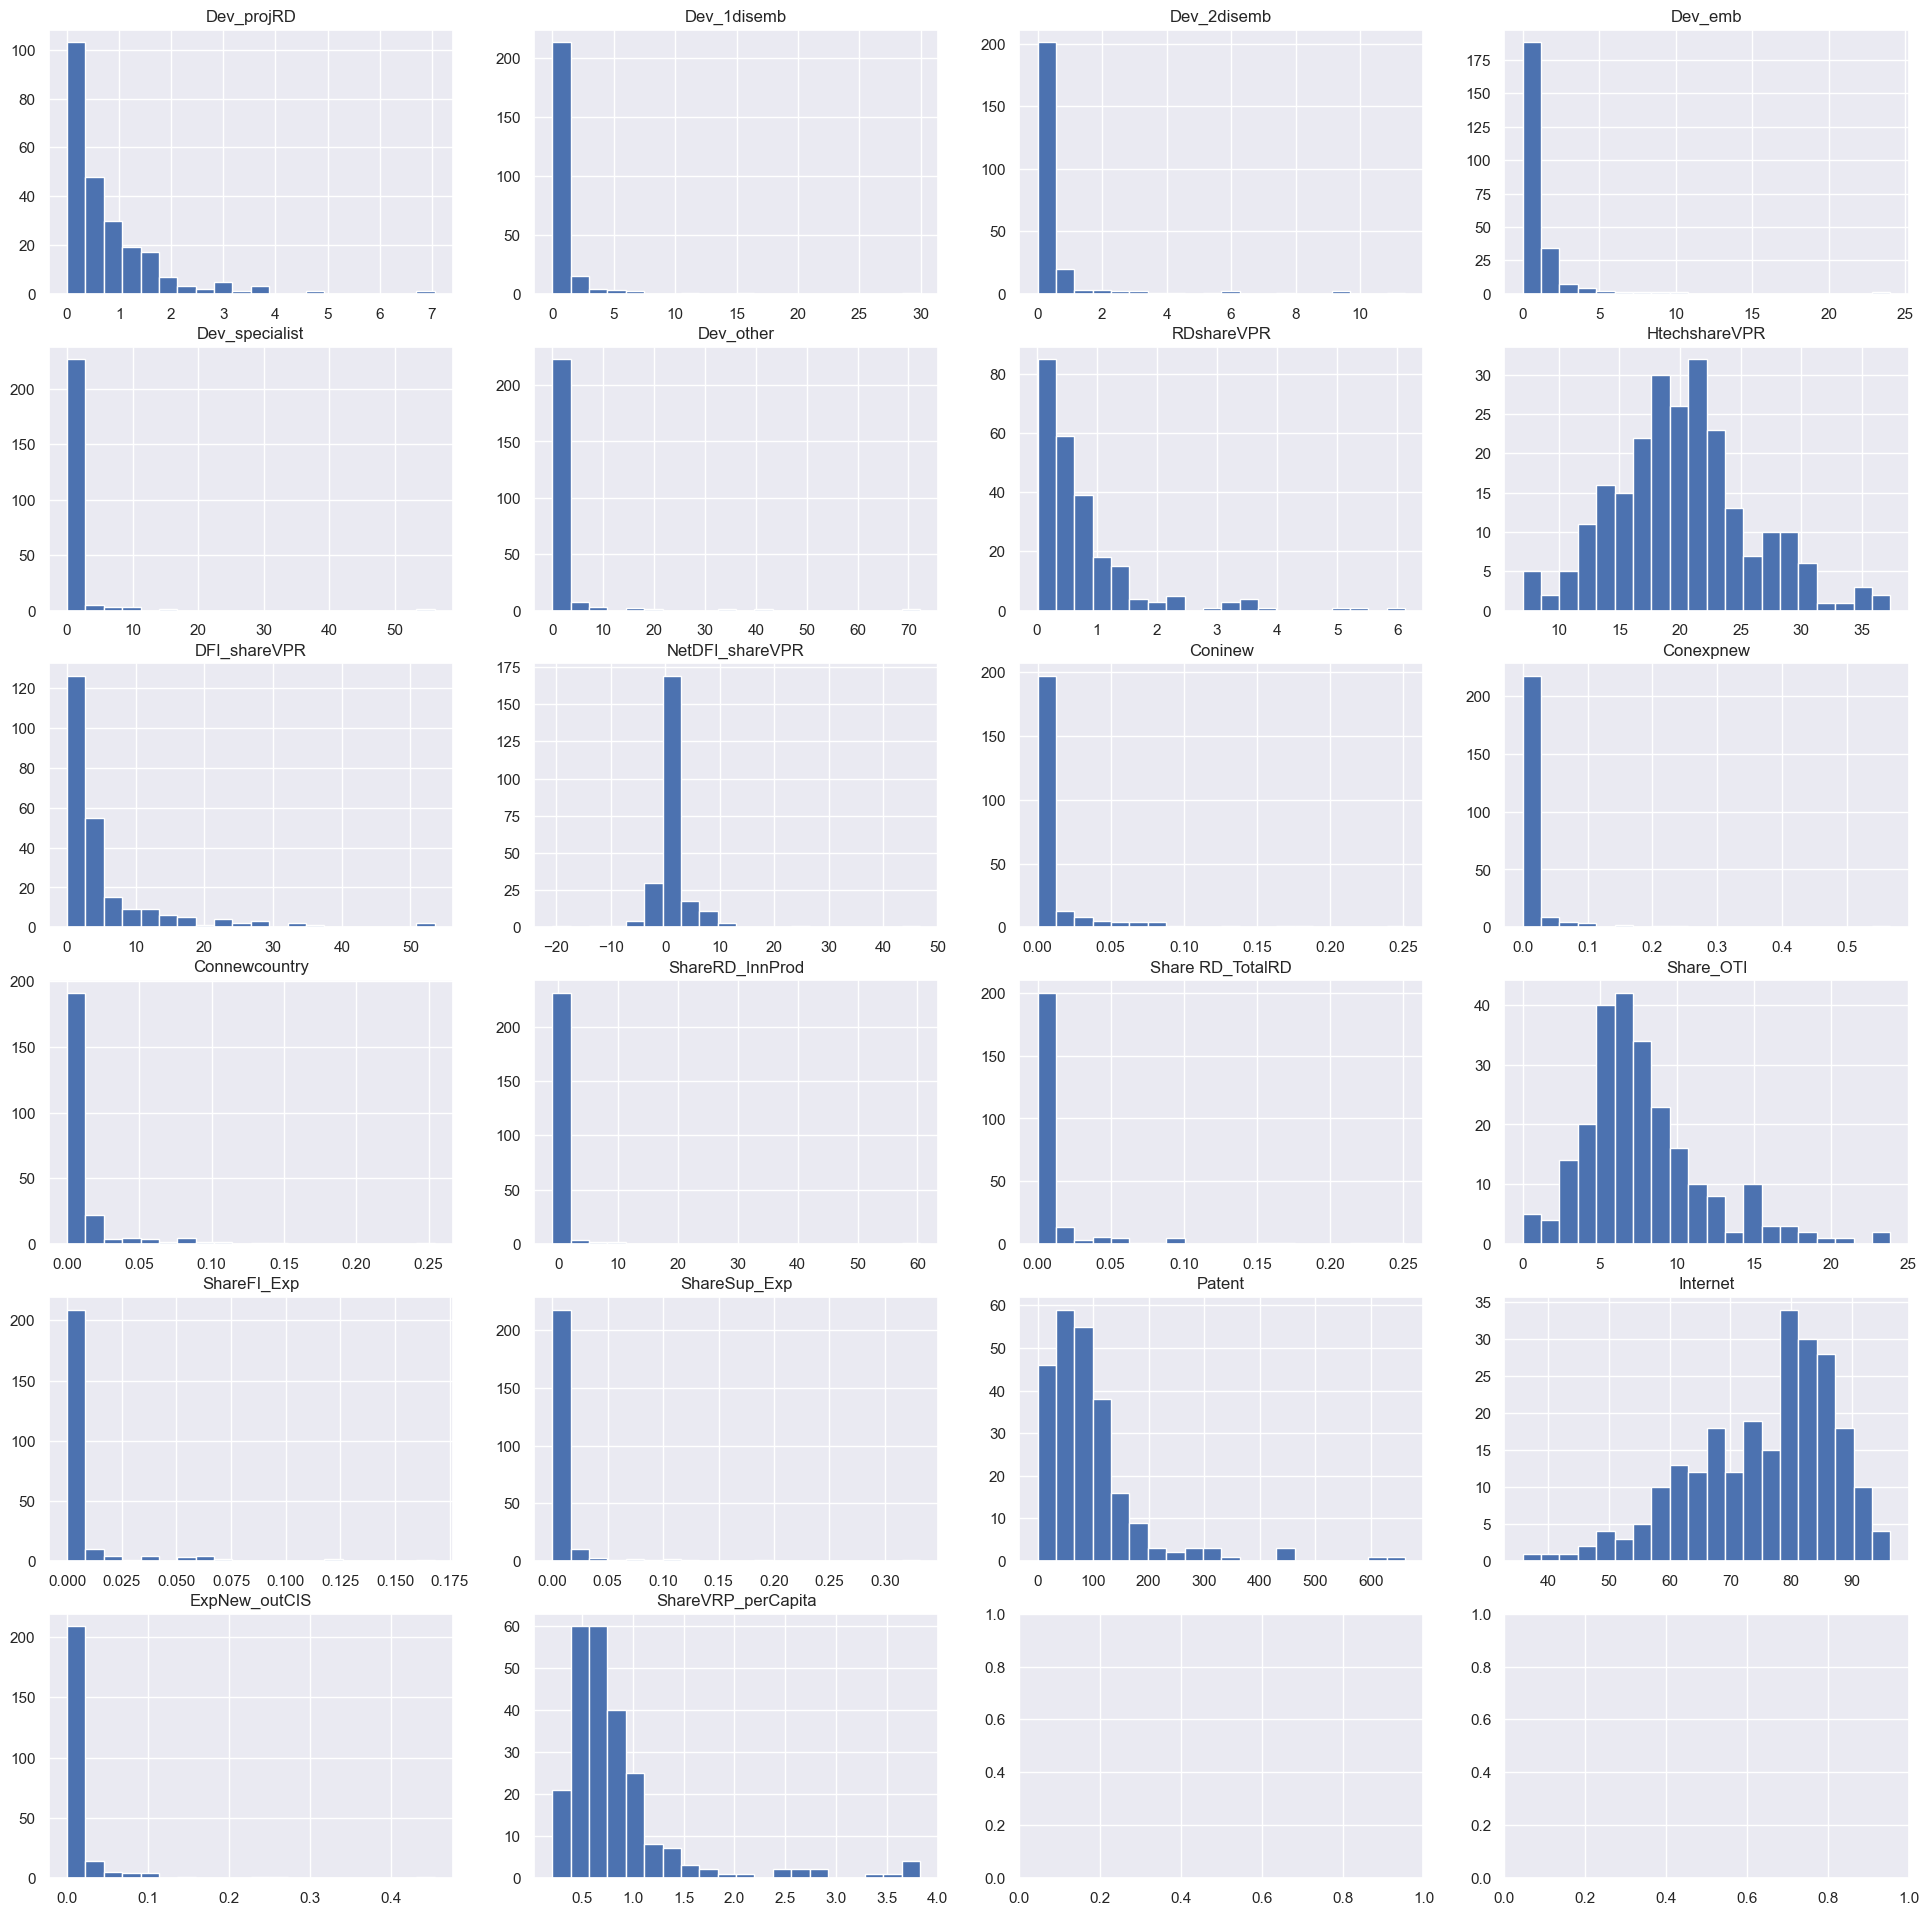

In [66]:
cols = list(data.columns)[1:]
fig, ax = plt.subplots(6, 4, figsize=(24, 24))
ax = ax.ravel()
for i, col in enumerate(cols):
  ax[i].hist(data[col], bins=20)
  ax[i].set_title(col)
plt.show()

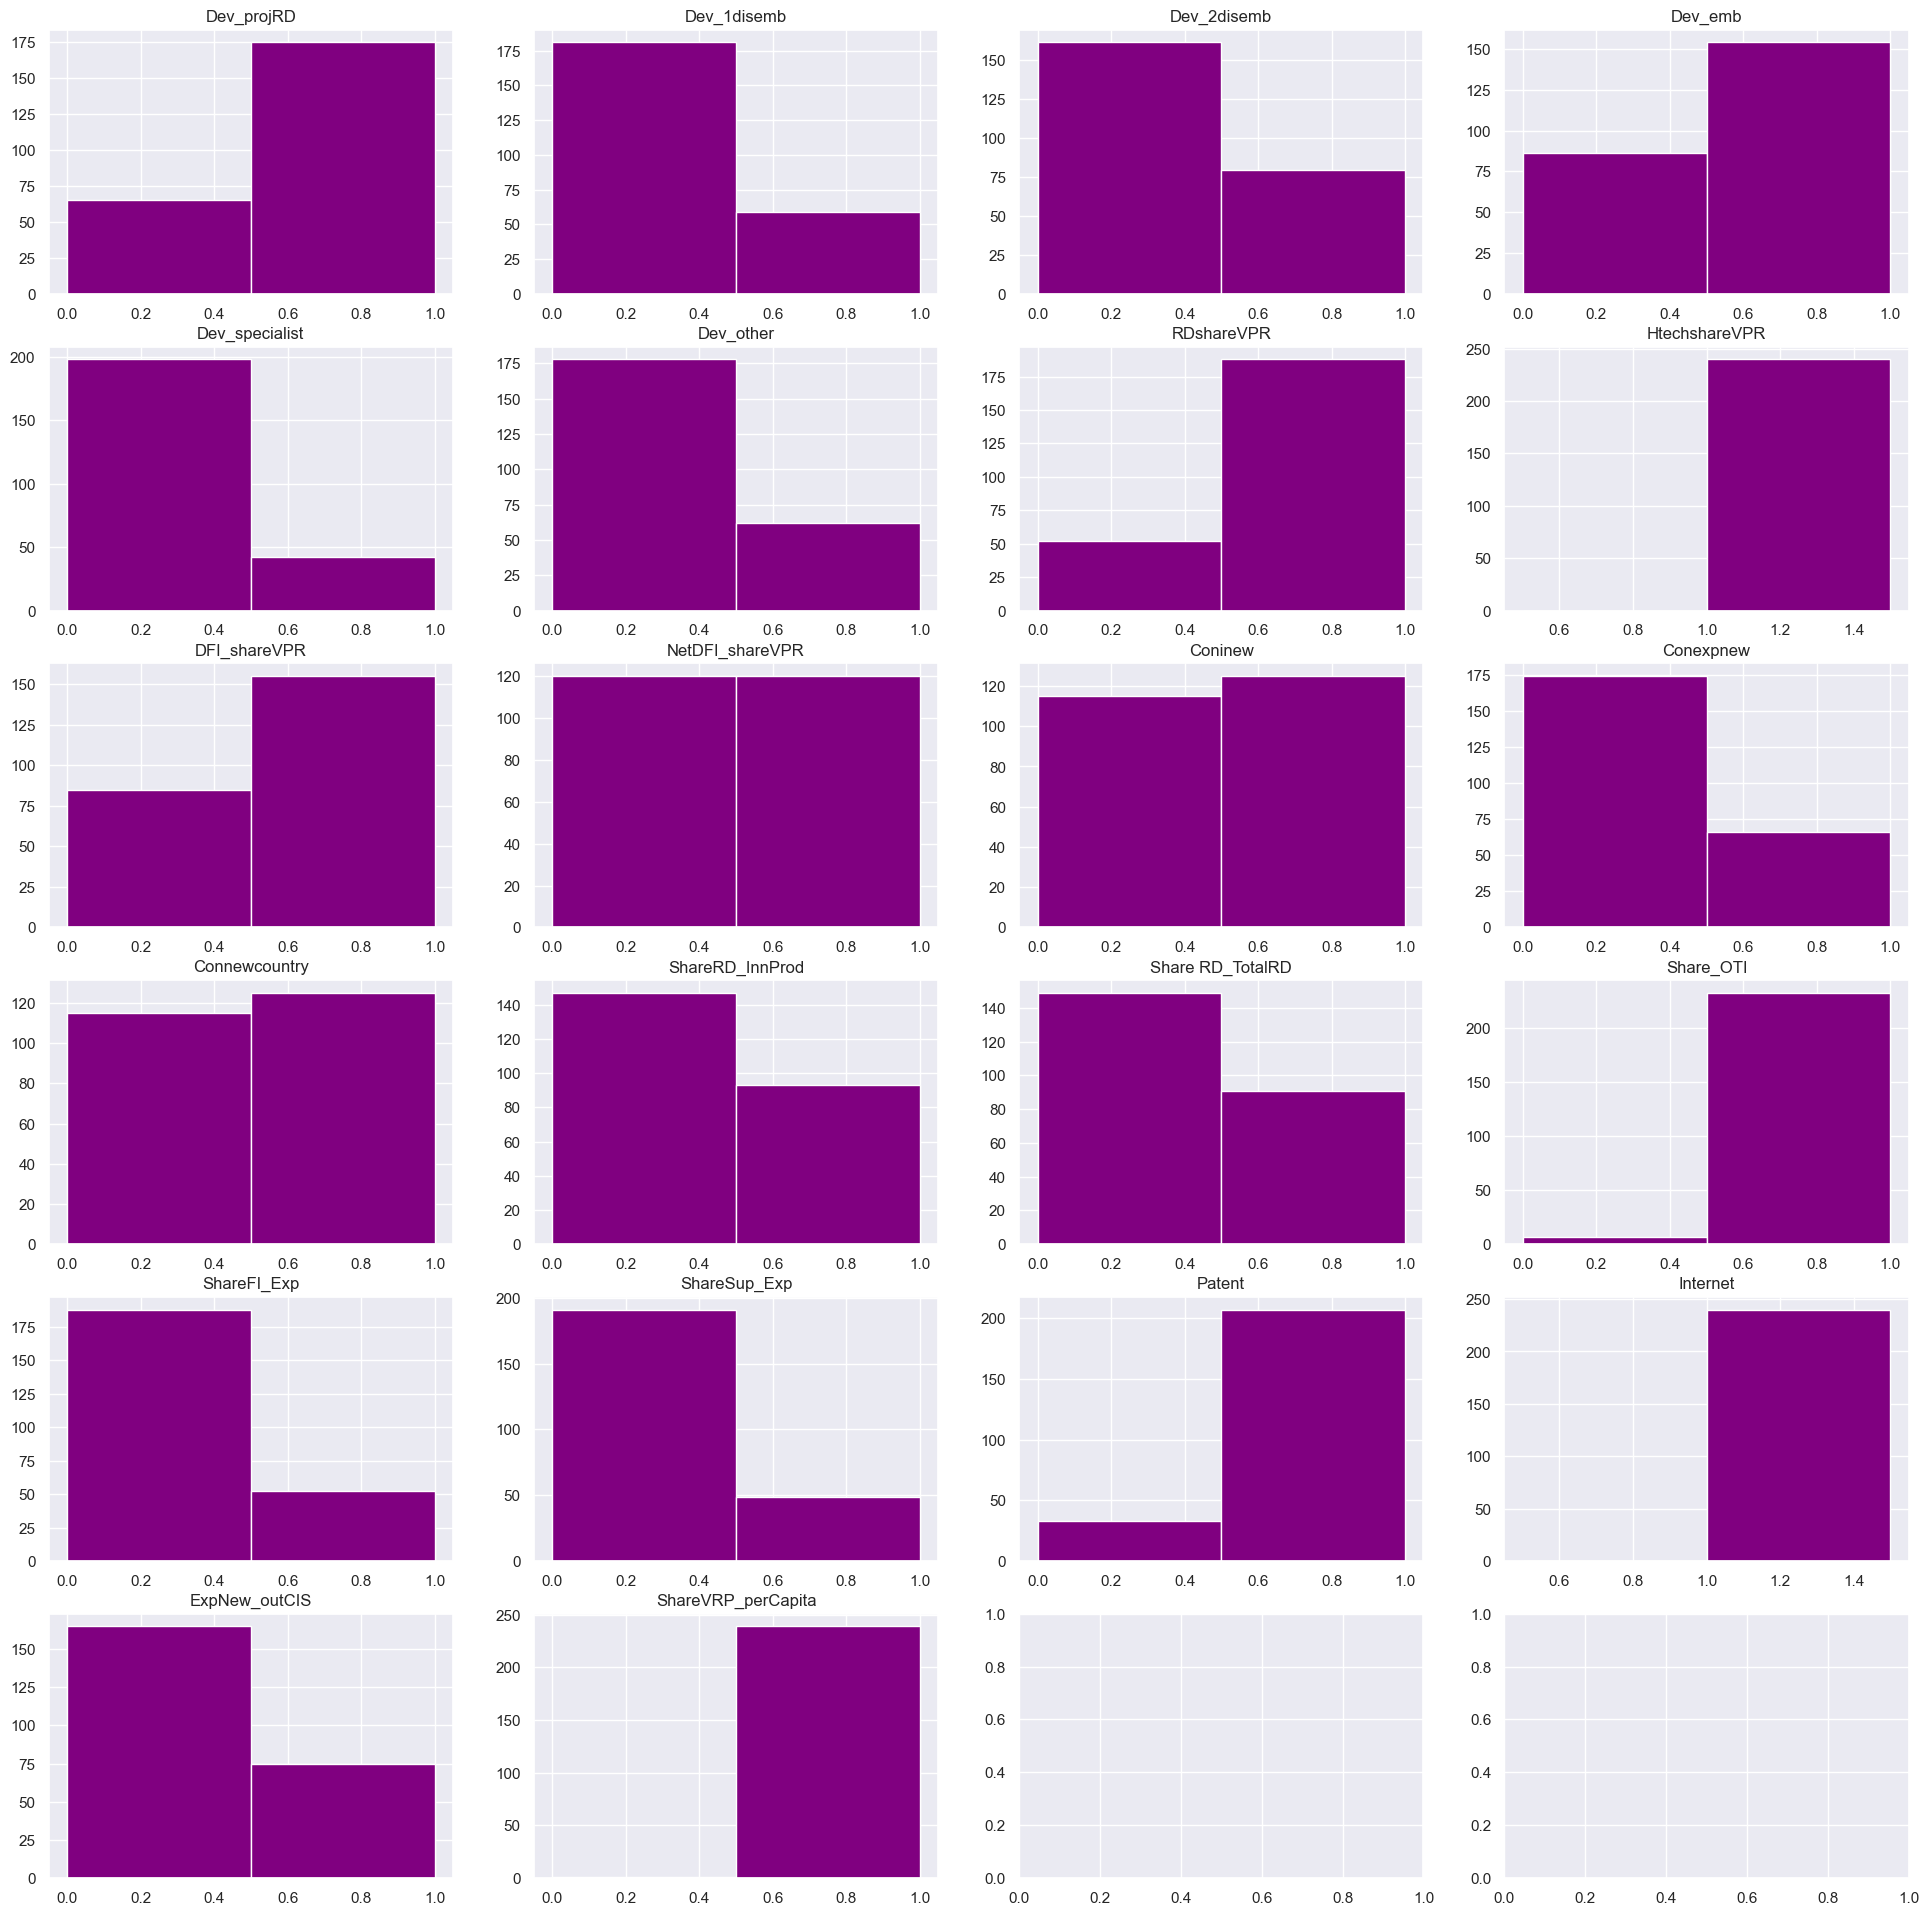

In [94]:
tr = data.describe().loc['mean', :]
binary_data = pd.DataFrame()
for i, col in enumerate(cols):
  binary_data[col] = (data[col] >= tr[i]/ 2 / 2).astype(int)

fig, ax = plt.subplots(6, 4, figsize=(24, 24))
ax = ax.ravel()
for i, col in enumerate(cols):
  ax[i].hist(binary_data[col], bins=2, color='purple')
  ax[i].set_title(col)
plt.show()

Выберем следущие фичи для исследования

In [68]:
choosen_cols = ['Dev_2disemb', 
                'Dev_emb', 
                'Dev_projRD',
                'Conexpnew',
                'Connewcountry',
                'Share_OTI',
                'Share RD_TotalRD',
                'Patent', 
                'ShareVRP_perCapita',
                ]

Выберем параметры который на мой взгляд отражают важные аспекты технологического развития и иновационной активности.

Dev_2disemb - Количество приобретенных неовеществленных технологий в виде патентов, лицензий, ноу-хау. Этот показатель оценивает насколько ренион активно приобретает интеллектуальную собственность. 

Dev_emb - Количество приобретенных овеществленных технологий. Этот параметр дополняет предыдущий, показывает объем реализованных технологий.

Dev_projRD - Количество совместных проектов ИиР с зарубежными партнерами. Данный параметр отражает уровень международного сотрудничества в области исследований и разработок, это может быть индикатором высокой инновационной активности.

Conexpnew - Доля региона в экспорте вновь внедренных или подвергнувшихся значительным технологическим изменениям товаров, работ, услуг. Это важено для оценки коммерческого успеха инноваций.

Connewcountry - Доля региона в отгруженных на внутренний рынок вновь внедренных или подвергнувшихся значительным технологическим изменениям товаров, работ, услуг. Показывает насколько инновации распространены внутри.

Share_OTI - Доля ОТИ в регионе. Это ключевой показатель, отражающий долю организаций, осуществляющих технологические инновации в общем объеме организаций региона.

Share RD_TotalRD - Доля региона в общих затратах на ИиР в стране. Насколько регион вовлечен в инновационную деятельность относительно страны.

Patent - Число патентов на изобретения, выданных Роспатентом российским заявителям (в расчете на 1 млн человек). Патенты напрямую говорят о какой-то иннтвацтонной деятельности.

ShareVRP_perCapita - Доля продукции, работ и услуг, созданных в высокотехнологичных отраслях, в валовом региональном продукте (на душу населения). Вклад высоких технологий в экономику региона.


In [76]:
df= binary_data[choosen_cols]
# df.insert(loc=0, column='Region', value=data['Region'])
df.head()

,Dev_2disemb,Dev_emb,Dev_projRD,Conexpnew,Connewcountry,Share_OTI,Share RD_TotalRD,Patent,ShareVRP_perCapita
0,0,0,0,1,1,1,1,1,1
1,1,0,1,0,0,1,0,0,1
2,0,1,1,0,1,1,1,1,1
3,0,0,1,0,1,1,1,1,1
4,0,0,0,0,0,0,0,1,0


In [77]:
!pip install mlxtend

/Users/ruslansavlaev/Desktop/govno/.conda/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=30278) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [74]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [102]:
apri = apriori(df[choosen_cols], min_support=0.5, use_colnames=True)
apri.sort_values('support', ascending=False)

/Users/ruslansavlaev/Desktop/govno/.conda/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.887500,(Share_OTI)
3,0.883333,(ShareVRP_perCapita)
7,0.833333,"(Share_OTI, ShareVRP_perCapita)"
2,0.712500,(Patent)
6,0.683333,"(Share_OTI, Patent)"
8,0.670833,"(ShareVRP_perCapita, Patent)"
10,0.654167,"(Share_OTI, ShareVRP_perCapita, Patent)"
0,0.541667,(Dev_projRD)
4,0.520833,"(Share_OTI, Dev_projRD)"
5,0.520833,"(ShareVRP_perCapita, Dev_projRD)"


In [129]:
rules = association_rules(apri, metric='confidence', min_threshold=0.9)
rules[(rules.support >=.5) & (rules.confidence >= .9) & (rules.lift <1.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dev_projRD),(Share_OTI),0.541667,0.887500,0.520833,0.961538,1.083424,0.040104,2.925000,0.168000
1,(Dev_projRD),(ShareVRP_perCapita),0.541667,0.883333,0.520833,0.961538,1.088534,0.042361,3.033333,0.177455
2,(Patent),(Share_OTI),0.712500,0.887500,0.683333,0.959064,1.080636,0.050990,2.748214,0.259544
3,(Share_OTI),(ShareVRP_perCapita),0.887500,0.883333,0.833333,0.938967,1.062982,0.049375,1.911538,0.526667
4,(ShareVRP_perCapita),(Share_OTI),0.883333,0.887500,0.833333,0.943396,1.062982,0.049375,1.987500,0.507857
5,(Patent),(ShareVRP_perCapita),0.712500,0.883333,0.670833,0.941520,1.065872,0.041458,1.995000,0.214961
6,"(Share_OTI, Dev_projRD)",(ShareVRP_perCapita),0.520833,0.883333,0.508333,0.976000,1.104906,0.048264,4.861111,0.198147
7,"(ShareVRP_perCapita, Dev_projRD)",(Share_OTI),0.520833,0.887500,0.508333,0.976000,1.099718,0.046094,4.687500,0.189237
8,(Dev_projRD),"(Share_OTI, ShareVRP_perCapita)",0.541667,0.833333,0.508333,0.938462,1.126154,0.056944,2.708333,0.244411
9,"(Share_OTI, Patent)",(ShareVRP_perCapita),0.683333,0.883333,0.654167,0.957317,1.083755,0.050556,2.733333,0.244050


In [124]:
rulesf = rules[rules['consequents'] == {'Share_OTI'}]
rulesf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dev_projRD),(Share_OTI),0.541667,0.8875,0.520833,0.961538,1.083424,0.040104,2.925000,0.168000
2,(Patent),(Share_OTI),0.712500,0.8875,0.683333,0.959064,1.080636,0.050990,2.748214,0.259544
4,(ShareVRP_perCapita),(Share_OTI),0.883333,0.8875,0.833333,0.943396,1.062982,0.049375,1.987500,0.507857
7,"(ShareVRP_perCapita, Dev_projRD)",(Share_OTI),0.520833,0.8875,0.508333,0.976000,1.099718,0.046094,4.687500,0.189237
10,"(ShareVRP_perCapita, Patent)",(Share_OTI),0.670833,0.8875,0.654167,0.975155,1.098767,0.058802,4.528125,0.273079


# (Dev_projRD) -> (Share_OTI)
Dev_projRD — это количество совместных проектов ИиР с зарубежными партнерами.
Share_OTI — доля организаций, осуществляющих технологические инновации.
Здесь высокая уверенность и поддержка указывает на то, в регионах с большим количеством международных проектов много организаций, занимающихся инновациями.
ЛОГИЧНО, что участие в международных проектах стимулирует инновации.
# (Patent) -> (Share_OTI)
Patent — это число патентов на изобретения. Регионы с большим количеством патентов, имеют высокую долю организаций, занимающихся инновационной деятельностьб.
ЛОГИЧНО, Результат деятельности инновационной организации = патент.
# (ShareVRP_perCapita) -> (Share_OTI)
ShareVRP_perCapita — это доля продукции, созданной в высокотехнологичных отраслях.
Высокая поддержка и уверенность показывает, что регионы с высоким вкладом технологичных отраслей в экономику также имеют высокую долю организаций, занимающихся инновациями.
Это почти одно и то же.
ЛОГИЧНО, так как высокотехнологичные отрасли являются причиной инноваций.
# (ShareVRP_perCapita, Dev_projRD) -> (Share_OTI)
Комбинация ShareVRP_perCapita и Dev_projRD увеличивает вероятность высокой доли инновационных организаций. Когда высокие технологии и международные проекты сочетаются, почти всегда появляется много организаций, занимающихся инновациями.
# (ShareVRP_perCapita, Patent) -> (Share_OTI)
ShareVRP_perCapita и Patent подтверждает, что регионы с сильными хайтек отраслями и большим числом патентов, имеют много предприятий, занимающихся инновациями. Отсюда и важность патентов и высоких технологий для инновационного развития региона.